In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=3
paper='1508.00296'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's break down the provided Hamiltonian and understand what we're dealing with.

The Hamiltonian consists of two main parts: 
1. The non-interacting part (T)
2. The interacting part (H^{int,Hartree})

First, let's identify the flavors and understand the structure of the Hamiltonian:

From the operators in the Hamiltonian, I see:
- `a^{\dagger}_{k \sigma}`, `a_{k \sigma}`: creation and annihilation operators for particles of type 'a' (which seems to refer to site 'N')
- `b^{\dagger}_{k \sigma}`, `b_{k \sigma}`: creation and annihilation operators for particles of type 'b' (which seems to refer to site 'B')
- `\sigma`: spin index, which can be up (↑) or down (↓)

So we have two types of flavors:
1. Site/orbital flavor: 'a' (N atom) or 'b' (B atom)
2. Spin flavor: 'σ' which can be up (↑) or down (↓)

Now, let's answer the questions:

QUESTION 1: Dimension and Basis Order
The Hamiltonian involves two flavors: site/orbital and spin. 
- 

In [7]:
print(generated_code['thinking'])

Let's break down the provided Hamiltonian and understand what we're dealing with.

The Hamiltonian consists of two main parts: 
1. The non-interacting part (T)
2. The interacting part (H^{int,Hartree})

First, let's identify the flavors and understand the structure of the Hamiltonian:

From the operators in the Hamiltonian, I see:
- `a^{\dagger}_{k \sigma}`, `a_{k \sigma}`: creation and annihilation operators for particles of type 'a' (which seems to refer to site 'N')
- `b^{\dagger}_{k \sigma}`, `b_{k \sigma}`: creation and annihilation operators for particles of type 'b' (which seems to refer to site 'B')
- `\sigma`: spin index, which can be up (↑) or down (↓)

So we have two types of flavors:
1. Site/orbital flavor: 'a' (N atom) or 'b' (B atom)
2. Spin flavor: 'σ' which can be up (↑) or down (↓)

Now, let's answer the questions:

QUESTION 1: Dimension and Basis Order
The Hamiltonian involves two flavors: site/orbital and spin. 
- For site/orbital, we have 2 possibilities: 'a' (N ato

In [8]:
print(generated_code['text'])

# Answer

1) Tuple of Flavors (D) = (2, 2)
Basis Order:
0: site/orbital. Order: 'a' (N atom), 'b' (B atom)
1: spin. Order: up (↑), down (↓)

2) EXP-VAL DEPENDENT TERMS: {
    r"\langle a^{\dagger}_{k, \sigma} a_{k, \sigma} \rangle": "Occupation number of N atoms with spin σ",
    r"\langle b^{\dagger}_{k, \sigma} b_{k, \sigma} \rangle": "Occupation number of B atoms with spin σ"
}
  
TERMS:
- t_{\rm N} \sum_{k, \sigma} a^{\dagger}_{k \sigma} a_{k \sigma} \sum_n e^{-ik\cdot n} -> H[0, σ, 0, σ, k], NI
- t_{\rm B} \sum_{k, \sigma} b^{\dagger}_{k \sigma} b_{k \sigma} \sum_n e^{-ik\cdot n} -> H[1, σ, 1, σ, k], NI
- t_{\rm BN} \sum_{k, \sigma} (a^{\dagger}_{k \sigma} b_{k \sigma} \sum_{n'} \exp{-ik\cdot n'}) -> H[0, σ, 1, σ, k], NI
- t_{\rm BN} \sum_{k, \sigma} (b^{\dagger}_{k \sigma} a_{k \sigma} \sum_{n'} \exp{ik\cdot n'}) -> H[1, σ, 0, σ, k], NI
- \Delta \sum_{k, \sigma} a^{\dagger}_{k \sigma} a_{k \sigma} -> H[0, σ, 0, σ, k], NI
- \frac{U_{\rm B}}{N} \sum_{k, \sigma \neq \sigma'} \langle

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
  """Hartree-Fock Hamiltonian for a square-centered lattice with N atoms at vertices and B atoms at centers.
  
  Args:
    N_shell (int): Number shell in the first Brillouin zone.
    parameters (dict): Dictionary containing model parameters.
    filling_factor (float): Filling factor. Default is 0.5.
  """
  def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
    self.lattice = 'square'   # Using square lattice for k-space generation
    self.D = (2, 2)  # (site/orbital, spin)
    self.basis_order = {'0': 'site', '1': 'spin'}
    # Order for each flavor:
    # site: a (N atom), b (B atom)
    # spin: up, down

    # Occupancy relevant parameters
    self.nu = filling_factor
    self.T = parameters.get('T', 0)  # temperature, default to 0
    self.a = parameters.get('a', 1.0)  # Lattice constant
    self.k_space = generate_k_space(self.lattice, N_shell, sel

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1508_00296_3.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

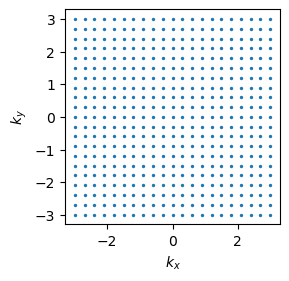

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0},filling_factor=1/2)


In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

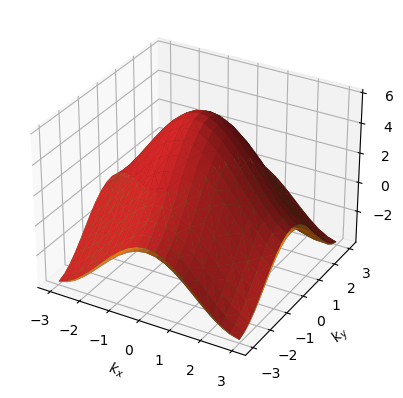

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

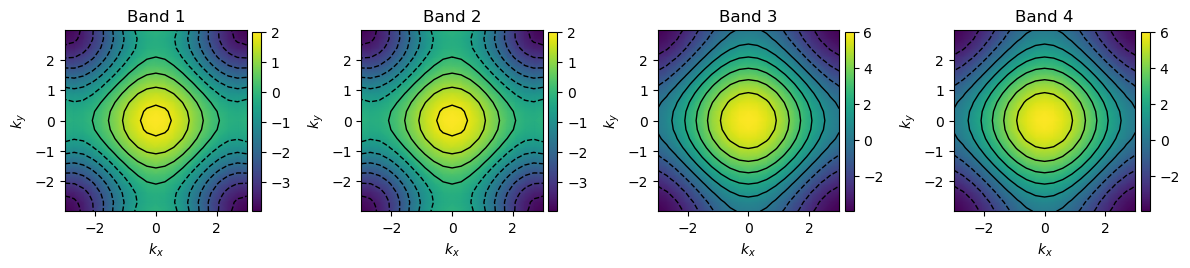

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'V_BN':1e-5,'U_N':0,'U_B':0,'V_B':0},filling_factor=1/2)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 0


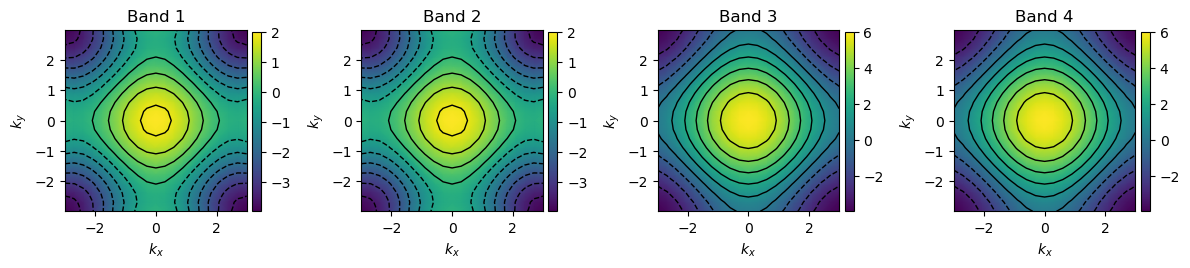

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'V_BN':1e5,'U_N':0,'U_B':0,'V_B':0},filling_factor=1/2)


In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
h_nonint[1,1,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 1


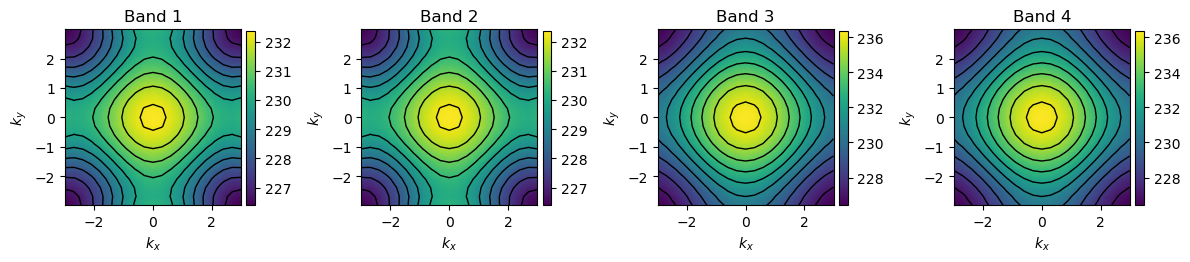

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is -5.94
U/T is 93.82
mean_U is 57.14


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the problem step by step according to the rubric:

The image shows a momentum space mesh in what appears to be the first Brillouin zone. The plot shows a grid of points in k-space, with both k_x and k_y axes ranging from approximately -3 to 3. The points are regularly spaced and form a square grid pattern.

Let's check this against what we expect for the system described in the problem:

1. The system is described as a "square-centered lattice" where N atoms are at the vertices of a square lattice and B atoms are at the centers of the squares.

2. For a square lattice, the first Brillouin zone is typically a square in reciprocal space.

Now, let's consider the point group symmetry:

For a square lattice, we expect the point group symmetry to be C4v (or 4mm in Hermann–Mauguin notation), which includes:
- 4-fold rotational symmetry (rotations by 90°)
- Reflections across vertical and horizontal axes
- Reflections across 

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image showing the band structure plots for a condensed matter system with a square-centered lattice. I need to evaluate whether the plots match the expected symmetry properties according to the rubric.

The image shows four color plots labeled "Band 1", "Band 2", "Band 3", and "Band 4". Each plot represents the energy dispersion of a different band in the first Brillouin zone, with the x and y axes labeled as k_x and k_y respectively, representing the crystal momentum.

Let's go through the rubric systematically:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square-centered lattice:

Looking at the plots, the range of k_x and k_y appears to be from approximately -3 to +3. The Brillouin zone for a square-centered lattice should be a square in reciprocal space. Although the full boundary isn't explicitly drawn, the plotting range forms a square region, which

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper,Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me analyze the image to determine if it correctly shows the false color plot for interacting-renormalized band structure in the first Brillouin zone for all bands after self-consistent Hartree-Fock calculation with infinitesimal interaction limit. I'll go through each point in the rubric:

1. First, I'll identify the shape of the Brillouin zone boundary:
   From the image, I can see the plots are defined in terms of kx and ky, with both axes going from approximately -3 to 3. The Brillouin zone for a square-centered lattice should be square-shaped. From the plots shown, the range of k-values appears to be showing the full first Brillouin zone with a square shape, with kx and ky both going from approximately -π to π (scaled here to about -3 to 3). This matches what's expected for a square-centered lattice.

2. Let's examine the symmetry of the energy distribution:
   2.1 The highest energy regions (yellow) are at the center of each

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='V_BN = 1e5',nu=1/2)
    )


#################### THINKING ####################

I'm looking at an image showing four band structure plots labeled "Band 1", "Band 2", "Band 3", and "Band 4". Each plot shows a false color representation of energy in k-space (the Brillouin zone), with axes labeled kx and ky ranging from approximately -3 to 3. The energy values are shown in color, with yellow representing the highest energies and dark purple representing the lowest.

Let me analyze this according to the rubric:

1. First, identify the shape of the Brillouin zone boundary:
   Looking at the plots, I see that the Brillouin zone appears to be square-shaped, with kx and ky axes ranging from about -3 to 3. This is consistent with what would be expected for a square-centered lattice, where the first Brillouin zone is typically square.

2. Examining the symmetry of the energy distribution:
   2.1 Highest energy regions (yellow): In all four bands, the highest energy (yellow) region appears to be at the center of the Brillo

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '3' saved to final_answer.yaml
